In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
data = pd.read_csv('/content/customer_support_tickets - customer_support_tickets.csv')

In [6]:
(data.head())

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 7:29:40,2023-06-01 1:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 0:12:42,2023-06-01 19:53:42,1.0


In [7]:
data = data.dropna()

In [8]:
label_encoders = {}

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['Customer Name', 'Customer Email', 'Customer Gender', 'Ticket Type', 'Ticket Subject',
                    'Ticket Status', 'Resolution', 'Ticket Priority', 'Ticket Channel']

for column in categorical_cols:
    data[column] = data[column].fillna('Unknown').astype(str)
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


In [18]:
print(data.isnull().sum())

Ticket ID                       0
Customer Name                   0
Customer Email                  0
Customer Age                    0
Customer Gender                 0
Product Purchased               0
Date of Purchase                0
Ticket Type                     0
Ticket Subject                  0
Ticket Description              0
Ticket Status                   0
Resolution                      0
Ticket Priority                 0
Ticket Channel                  0
First Response Time             0
Time to Resolution              0
Customer Satisfaction Rating    0
YearMonth                       0
dtype: int64


In [32]:
data['Resolution'].fillna('No resolution provided', inplace=True)

/tmp/ipython-input-32-1040016152.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Resolution'].fillna('No resolution provided', inplace=True)


In [20]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['First Response Time'] = pd.to_datetime(data['First Response Time'], errors='coerce')
data['Time to Resolution'] = pd.to_datetime(data['Time to Resolution'], errors='coerce')

In [21]:
data['Response Delay (hrs)'] = (data['First Response Time'] - data['Date of Purchase']).dt.total_seconds() / 3600
data['Resolution Time (hrs)'] = (data['Time to Resolution'] - data['First Response Time']).dt.total_seconds() / 3600

In [24]:
data['Customer Gender'] = data['Customer Gender'].apply(lambda x: str(x).lower() if pd.notnull(x) else x)
data['Ticket Status'] = data['Ticket Status'].astype('category')

In [14]:
common_issues = data['Ticket Subject'].value_counts().head(10)
print("Top 10 Common Issues:")
print(common_issues)

Top 10 Common Issues:
Ticket Subject
8     201
15    199
11    195
12    186
13    183
6     183
4     178
14    178
1     173
0     171
Name: count, dtype: int64


In [16]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['YearMonth'] = data['Date of Purchase'].dt.to_period('M')
ticket_trends = data.groupby('YearMonth').size()

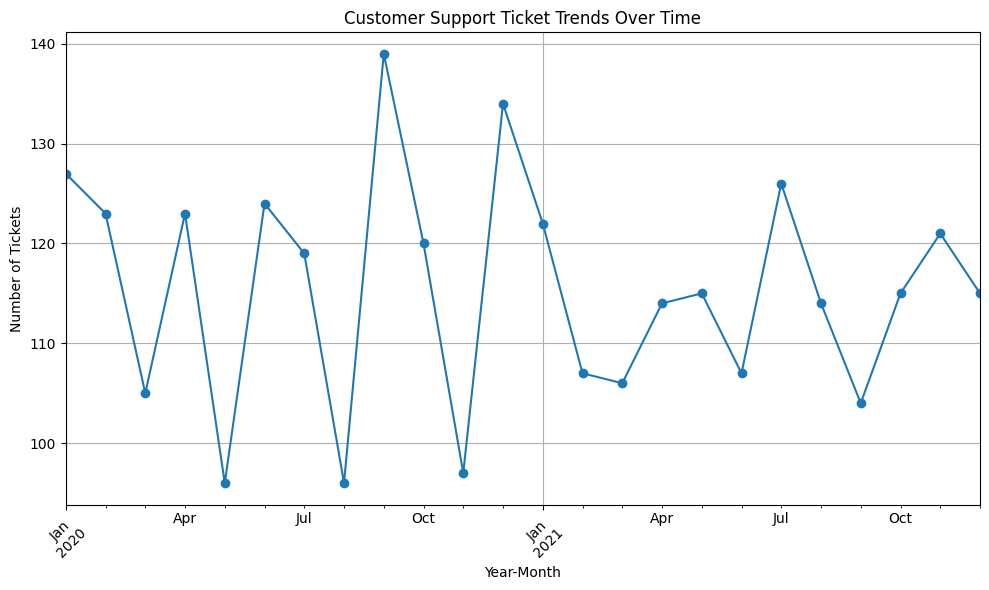

In [17]:
plt.figure(figsize=(10, 6))
ticket_trends.plot(kind='line', marker='o')
plt.title('Customer Support Ticket Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tickets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

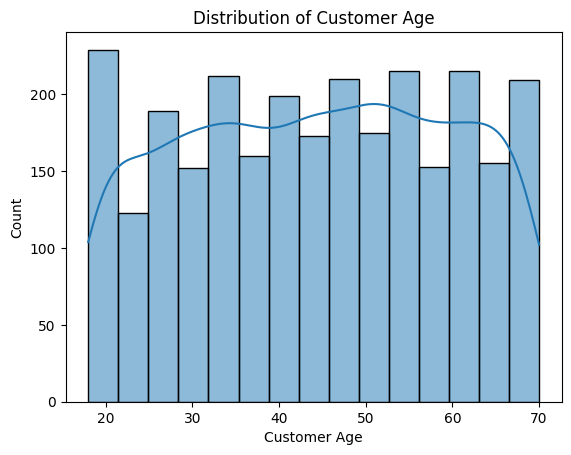

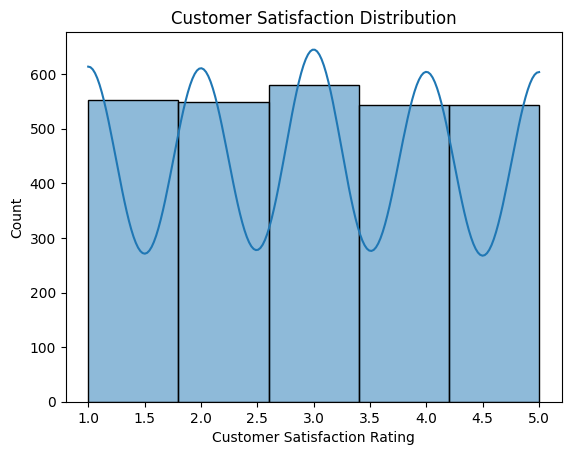

In [25]:
sns.histplot(data['Customer Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.show()
sns.histplot(data['Customer Satisfaction Rating'], bins=5, kde=True)
plt.title('Customer Satisfaction Distribution')
plt.show()

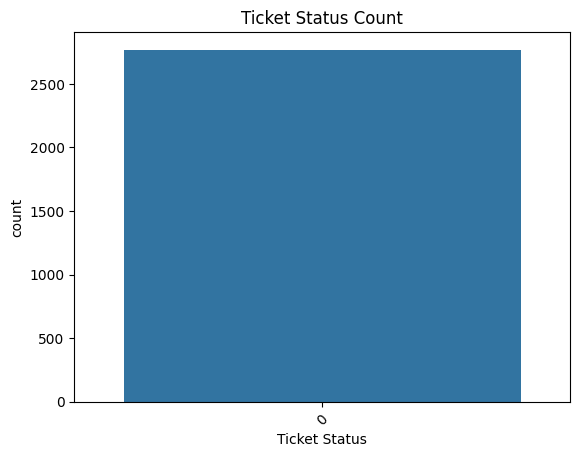

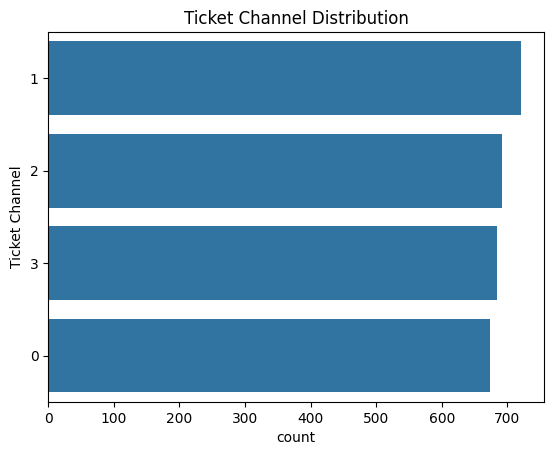

In [26]:
sns.countplot(x='Ticket Status', data=data)
plt.title('Ticket Status Count')
plt.xticks(rotation=45)
plt.show()
sns.countplot(y='Ticket Channel', data=data, order=data['Ticket Channel'].value_counts().index)
plt.title('Ticket Channel Distribution')
plt.show()

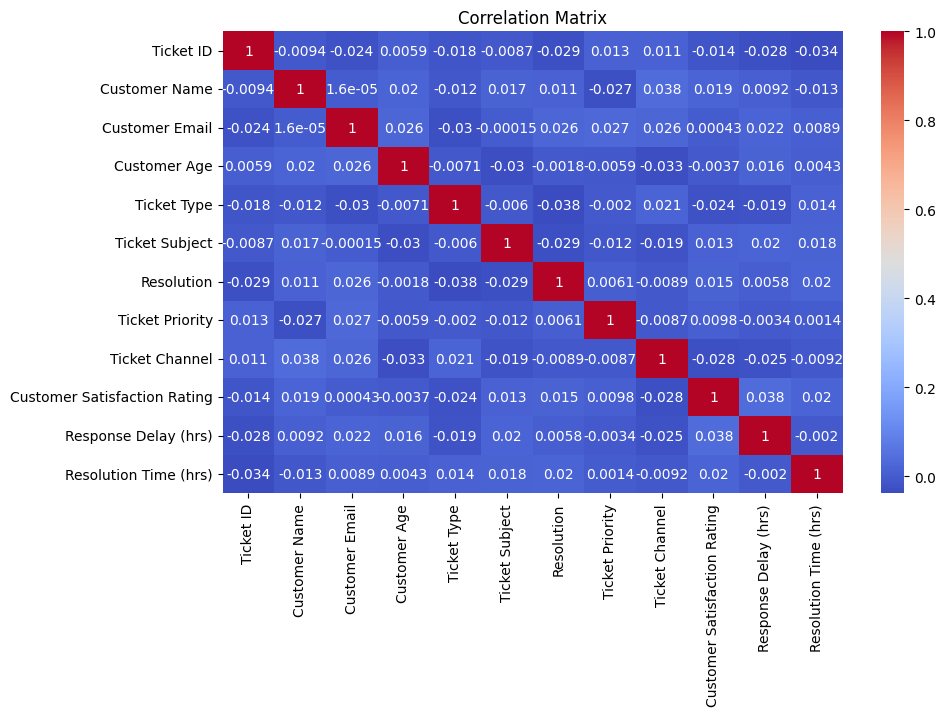

In [27]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

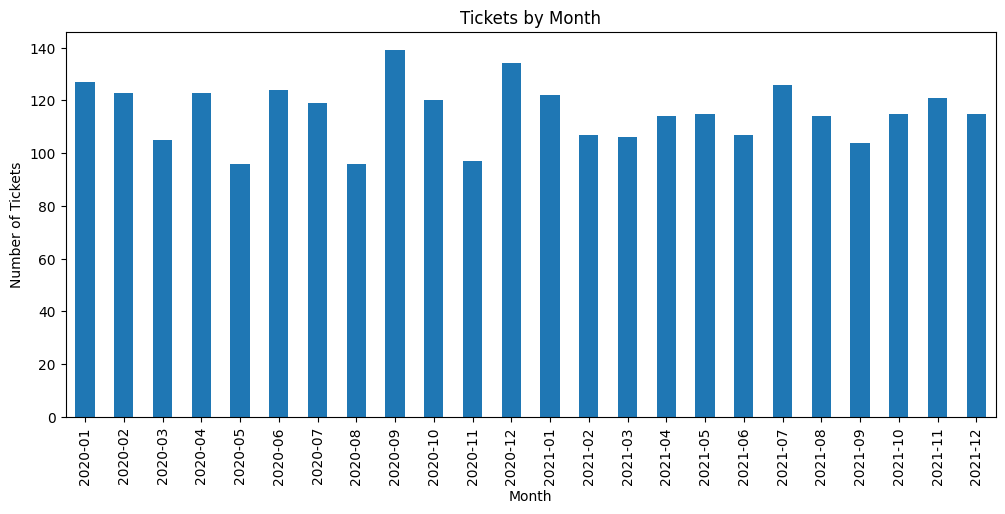

In [28]:
data['Date of Purchase'] = pd.to_datetime(data['Date of Purchase'])
data['Purchase Month'] = data['Date of Purchase'].dt.to_period('M')

monthly_counts = data['Purchase Month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', figsize=(12, 5), title='Tickets by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tickets')
plt.show()

In [33]:
sns.set(style="whitegrid")

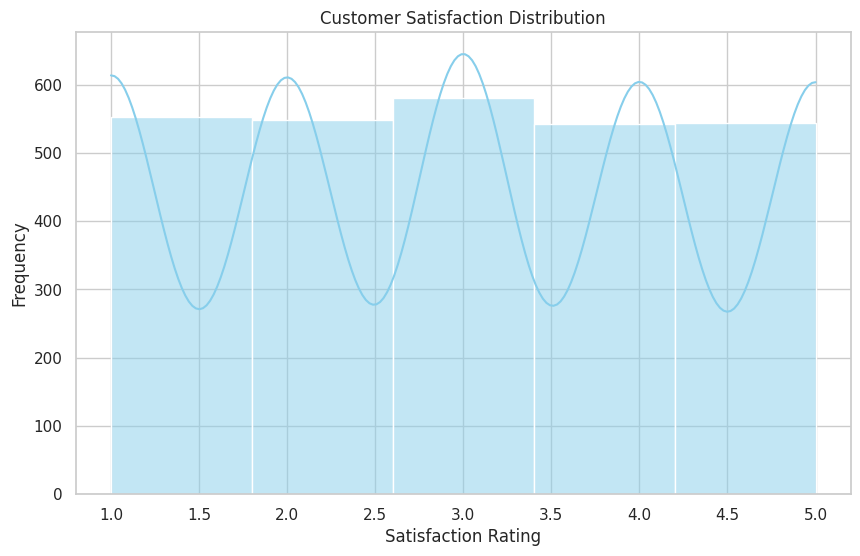

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Satisfaction Rating'], bins=5,
kde=True, color='skyblue')
plt.title('Customer Satisfaction Distribution')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Frequency')
plt.show()

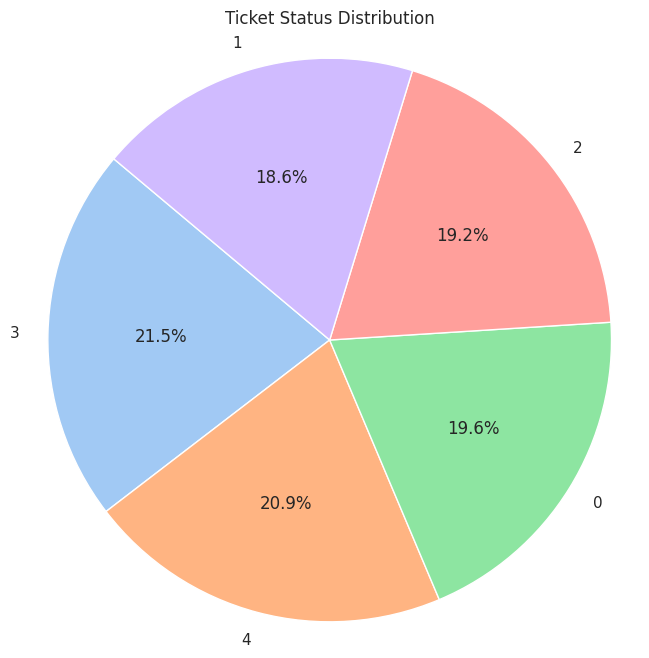

In [38]:
ticket_status_distribution = data['Ticket Type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(ticket_status_distribution,
labels=ticket_status_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('pastel'), startangle=140)
plt.title('Ticket Status Distribution')
plt.axis('equal')
plt.show()

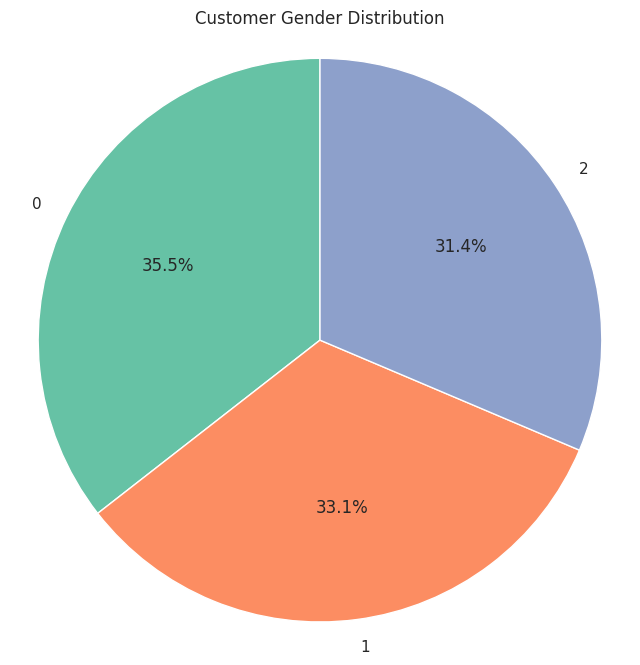

In [44]:
customer_gender_distribution = data['Customer Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(customer_gender_distribution,
labels=customer_gender_distribution.index, autopct='%1.1f%%',
colors=sns.color_palette('Set2'), startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

/tmp/ipython-input-43-3460744334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ticket_channel_distribution.index,


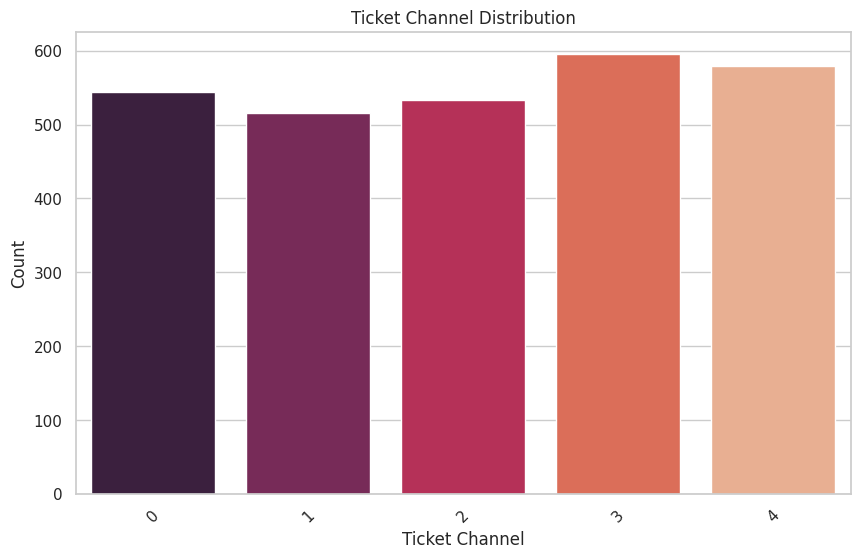

In [43]:
plt.figure(figsize=(10, 6))
ticket_channel_distribution = data['Ticket Type'].value_counts()
sns.barplot(x=ticket_channel_distribution.index,
y=ticket_channel_distribution, palette='rocket')
plt.title('Ticket Channel Distribution')
plt.xlabel('Ticket Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

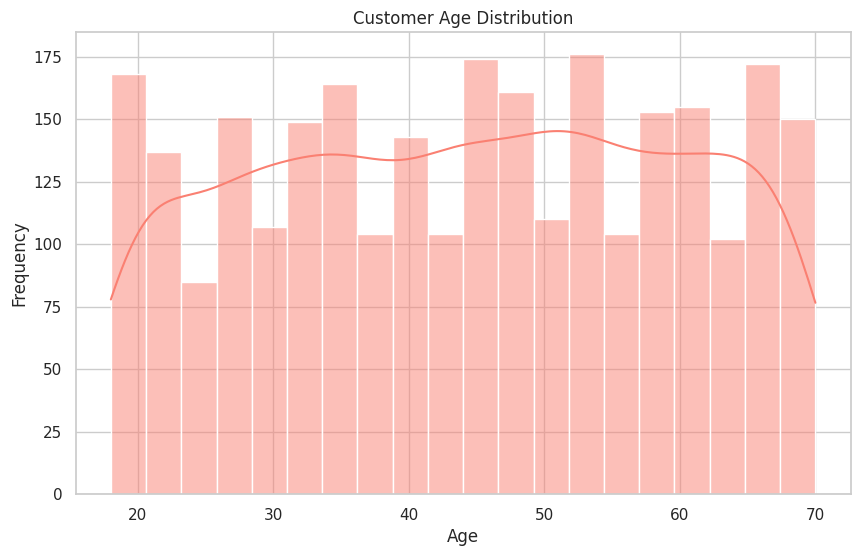

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Customer Age'], bins=20, kde=True,
color='salmon')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [45]:
ticket_type_distribution = data['Ticket Type'].value_counts()

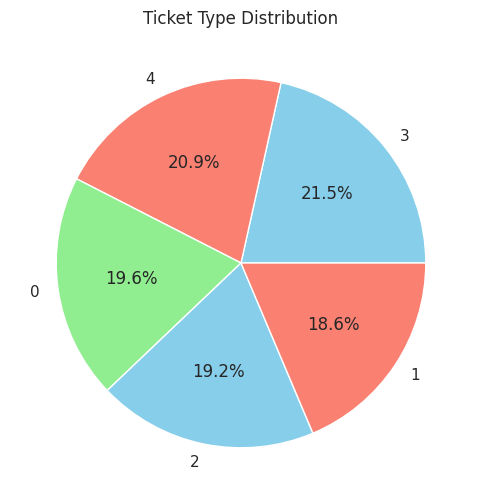

In [46]:
plt.figure(figsize=(8, 6))
ticket_type_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['skyblue', 'salmon', 'lightgreen'])
plt.title('Ticket Type Distribution')
plt.ylabel('')
plt.show()

In [47]:
priority_distribution = data['Ticket Priority'].value_counts()

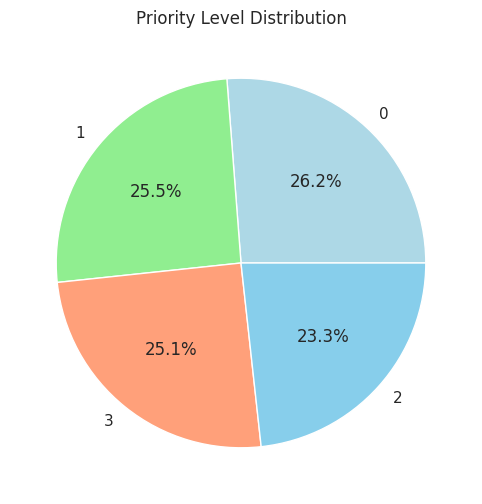

In [48]:
plt.figure(figsize=(8, 6))
priority_distribution.plot(kind='pie', autopct='%1.1f%%',
colors=['lightblue', 'lightgreen', 'lightsalmon', 'skyblue'])
plt.title('Priority Level Distribution')
plt.ylabel('')
plt.show()

/tmp/ipython-input-49-1073764491.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tickets_by_age_group = data.groupby('Age Group').size()


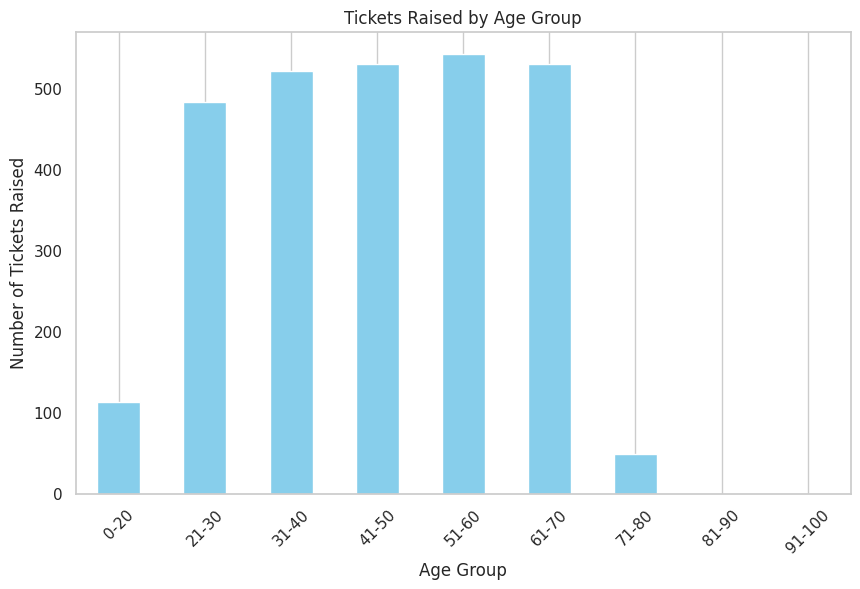

In [49]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70',
'71-80', '81-90', '91-100']
data['Age Group'] = pd.cut(data['Customer Age'], bins=bins,
labels=labels, right=False)
tickets_by_age_group = data.groupby('Age Group').size()

plt.figure(figsize=(10, 6))
tickets_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Tickets Raised by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tickets Raised')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

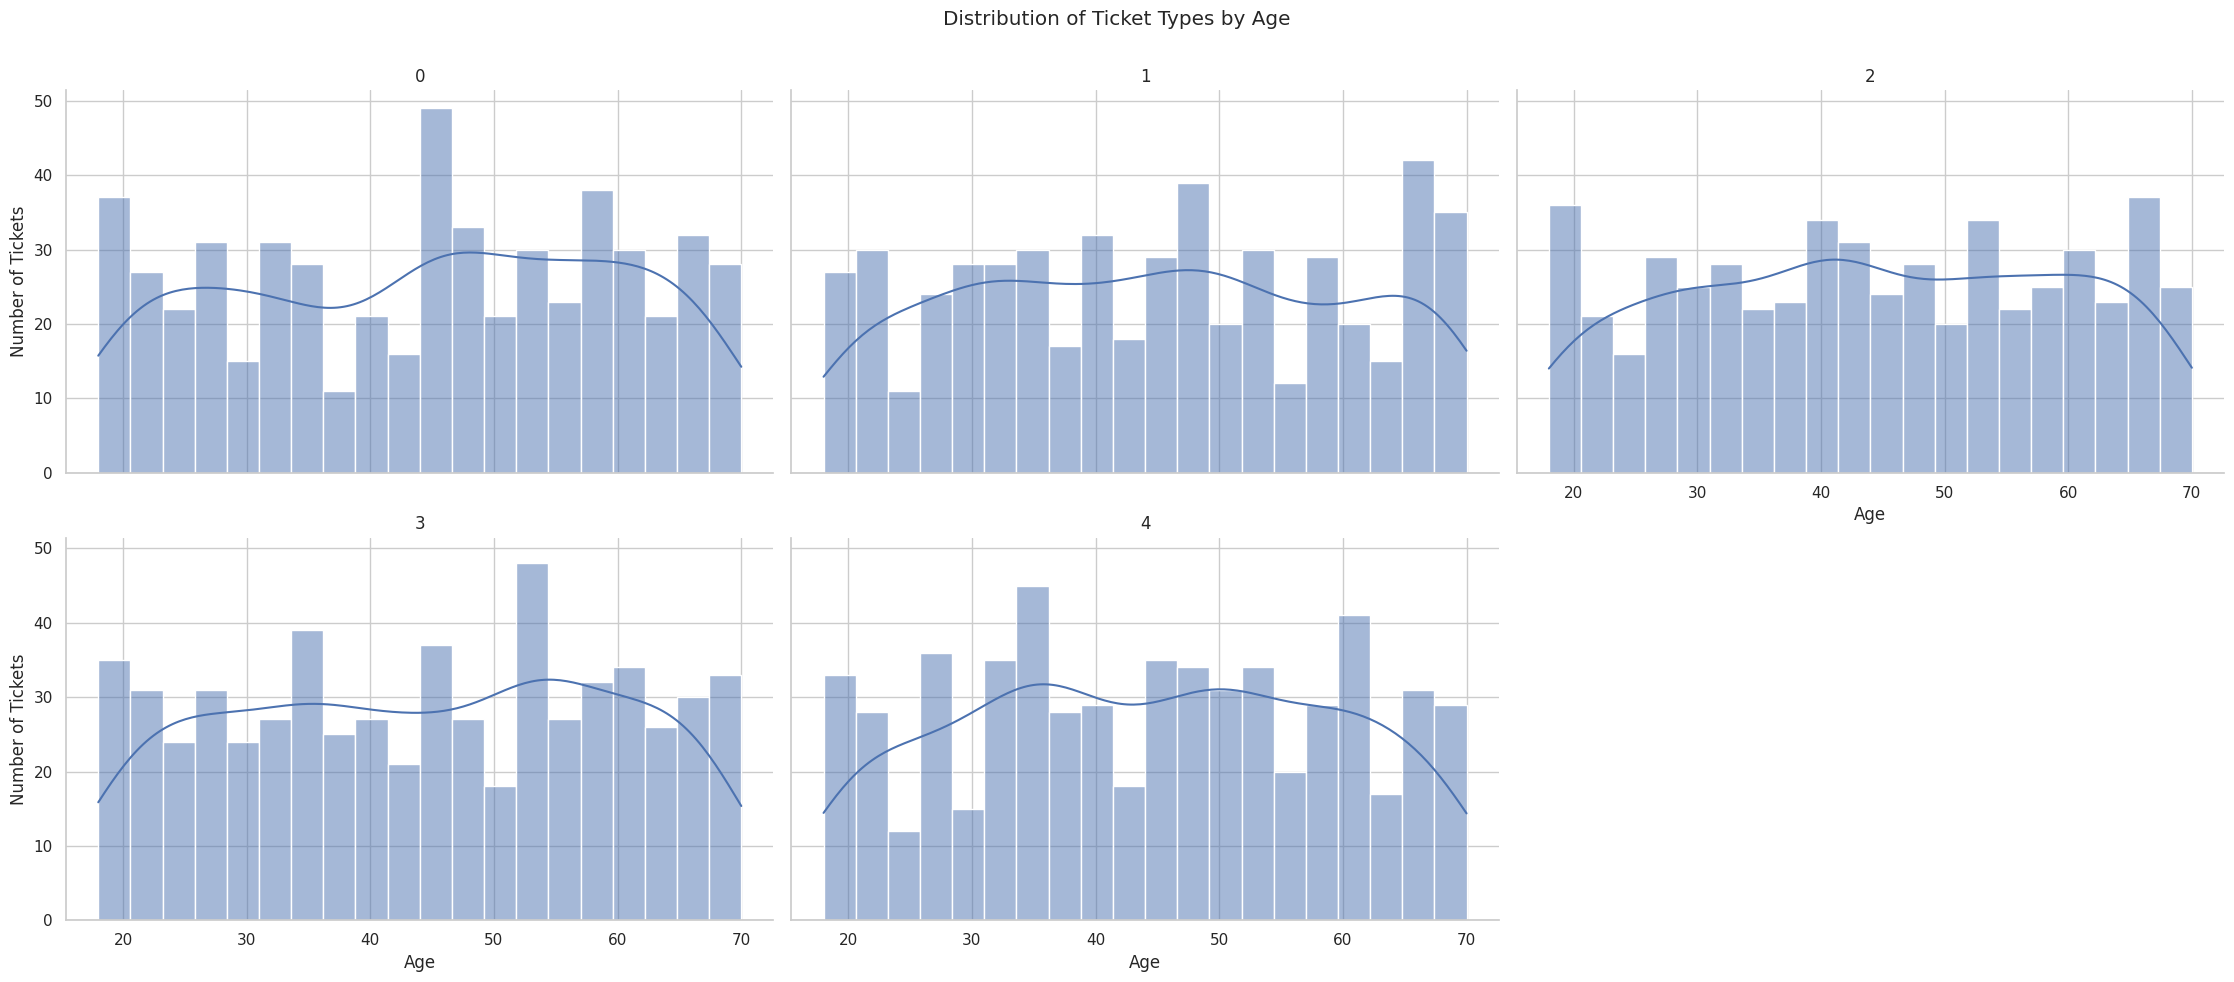

In [50]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
g = sns.FacetGrid(data, col='Ticket Type', col_wrap=3,
height=5, aspect=1.5)
g.map(sns.histplot, 'Customer Age', bins=20, kde=True)
g.set_titles('{col_name}')
g.set_axis_labels('Age', 'Number of Tickets')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Ticket Types by Age')
plt.show()

In [29]:
ticket_type_segmentation = data.groupby('Ticket Type').size()
print("\nSegmentation based on Ticket Types:")
print(ticket_type_segmentation)


Segmentation based on Ticket Types:
Ticket Type
0    544
1    516
2    533
3    596
4    580
dtype: int64


In [31]:
satisfaction_segmentation = data.groupby('Customer Satisfaction Rating').size()
print("\nSegmentation based on Customer Satisfaction Levels:")
print(satisfaction_segmentation)


Segmentation based on Customer Satisfaction Levels:
Customer Satisfaction Rating
1.0    553
2.0    549
3.0    580
4.0    543
5.0    544
dtype: int64


In [51]:
y = data['Customer Satisfaction Rating']
X = data.drop(columns=['Customer Satisfaction Rating', 'Ticket ID', 'Customer Email', 'Ticket Description', 'Resolution'])

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])
from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Customer Name', 'Customer Age', 'Ticket Type', 'Ticket Subject',
       'Ticket Priority', 'Ticket Channel', 'Response Delay (hrs)',
       'Resolution Time (hrs)'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Customer Gender', 'Product Purchased', 'Ticket Status', 'Age Group'], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [55]:
y_pred = clf.predict(X_test)

Accuracy: 0.22743682310469315

Classification Report:
               precision    recall  f1-score   support

         1.0       0.17      0.15      0.16       109
         2.0       0.23      0.24      0.23       117
         3.0       0.23      0.31      0.26       112
         4.0       0.20      0.18      0.19       108
         5.0       0.31      0.26      0.28       108

    accuracy                           0.23       554
   macro avg       0.23      0.23      0.23       554
weighted avg       0.23      0.23      0.23       554



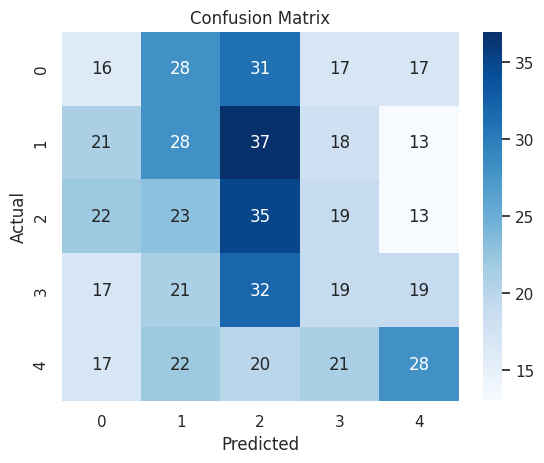

In [56]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

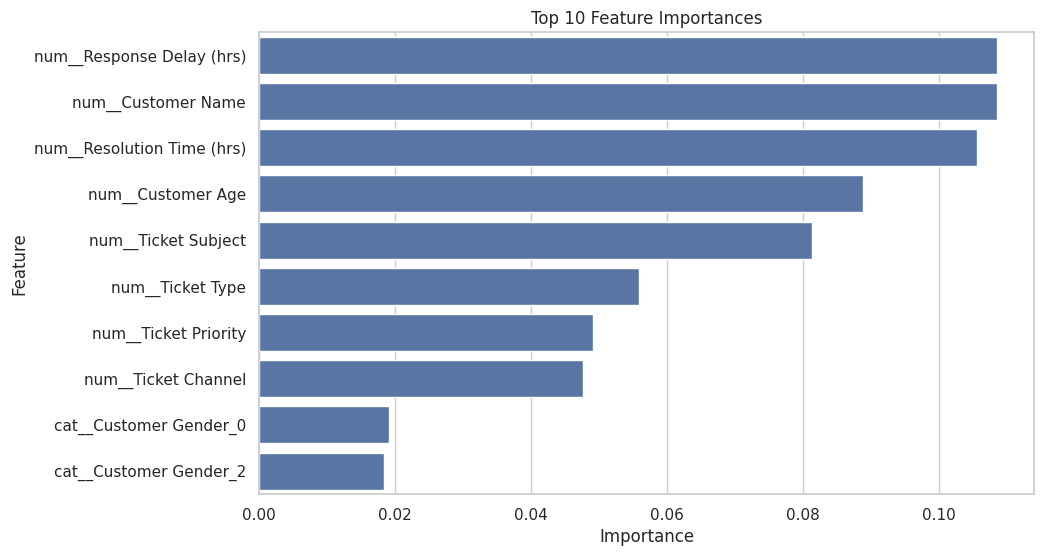

In [57]:
feature_names = clf.named_steps['preprocessor'].get_feature_names_out()
importances = clf.named_steps['classifier'].feature_importances_
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()